# Práctica 01
## Grupo Laboratorio: 1
## Estudiantes:
- Flores Medina Erik Daniel
- Gutierrez Coronado Matias Ezequiel


In [418]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [419]:
# Manejo de rutas y directorios
import os

# Cálculo científico y vectorial
import numpy as np
import pandas as pd  # Para trabajar con archivos CSV

# Librerías para graficar
import matplotlib.pyplot as plt
# Librerias para graficar
from matplotlib import pyplot
# Módulo de optimización de scipy
from scipy import optimize

# Le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [420]:
dataset_path = "/content/drive/MyDrive/Colab Notebooks/heart.csv"
data = pd.read_csv(dataset_path)
print(data.shape[0])

918


In [421]:
X = data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].values  # Variables predictoras
y = data['HeartDisease'].values  # Variable objetivo
print(X)

[[ 40.  140.  289.  172.    0. ]
 [ 49.  160.  180.  156.    1. ]
 [ 37.  130.  283.   98.    0. ]
 ...
 [ 57.  130.  131.  115.    1.2]
 [ 57.  130.  236.  174.    0. ]
 [ 38.  138.  175.  173.    0. ]]


In [422]:
print(y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

In [423]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [424]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [425]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [426]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [427]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

Theta calculado por el descenso por gradiente: [ 0.0003107   0.03106479  0.01899023 -0.00377247 -0.02324082  0.00808687]
La persona tiene enfermedad cardiaca (usando el descenso por el gradiente): 0


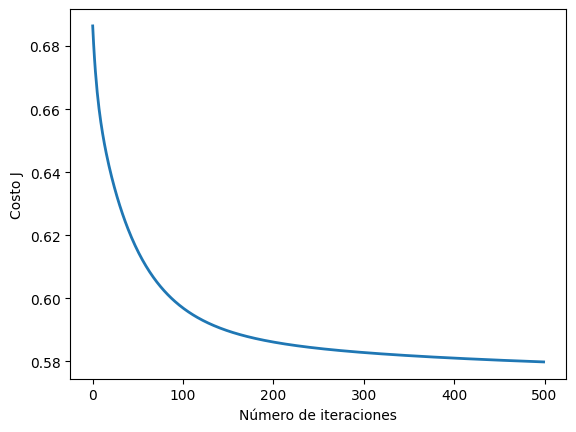

In [428]:
# Inicializar valores
alpha = 0.00009
num_iters = 500
theta = np.zeros(n + 1)

# Ejecutar el descenso por el gradiente
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Graficar la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')

# Mostrar los resultados del descenso por el gradiente
print('Theta calculado por el descenso por gradiente:', theta)


# Verificar si una persona tiene enfermedad cardíaca según sus valores
X_array = np.array([1, 40, 140, 289, 172, 0])  # 1 (intercepto) + valores de Edad, Presión, Colesterol, MaxHR, Oldpeak
prueba = sigmoid(np.dot(X_array, theta))   #

print('La persona tiene enfermedad cardiaca (usando el descenso por el gradiente): {:.0f}'.format(prueba))

In [429]:
X_array = [1, 80, 100, 215, 108, 1.5]
y_predicted = sigmoid(np.dot(X_array, theta))
print('La persona tiene enfermedad cardiaca -> {:.0f}'.format(y_predicted))

La persona tiene enfermedad cardiaca -> 1


In [430]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [431]:
# Inicialización de parámetros de ajuste
initial_theta = np.zeros(n + 1)  # Se inicializan los parámetros (con el +1 para el término de intercepto)
print(initial_theta)

# Calcular el costo y gradiente en theta inicial
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (ceros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (ceros):')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad))

[0. 0. 0. 0. 0. 0.]
Costo en theta inicial (ceros): 0.693
Costo esperado (aproximado): 0.693

[-0.05337691 -4.17810458 -8.05664488  2.03812636 -2.2369281  -0.26143791]
Gradiente en theta inicial (ceros):
	[-0.0534, -4.1781, -8.0566, 2.0381, -2.2369, -0.2614]


In [432]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*theta))

Costo con un valor de theta encontrado por optimize.minimize: 0.504
theta:
	[2.777, 0.018, 0.004, -0.005, -0.028, 0.955]


<ipython-input-432-5093486f81b9>:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


In [433]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [434]:
X_array = np.array([1, 45, 140, 289, 172, 0])  # 1 (intercepto) + valores de Edad, Presión, Colesterol, MaxHR, Oldpeak
probabilidad_enfermedad = sigmoid(np.dot(X_array, theta))
print(f'Para un paciente con Edad = 45, Presión = 140, Colesterol = 289, Frecuencia Cardíaca Máxima = 172, Oldpeak = 0, '
      f'se predice una probabilidad de enfermedad cardíaca de: {probabilidad_enfermedad:.3f}')
# Calcular la precisión en el conjunto de entrenamiento para ver cuán bien se ha entrenado el modelo
predicciones = predict(theta, X)
precisión = np.mean(predicciones == y) * 100
print(f'Precisión de entrenamiento: {precisión:.2f} %')


Para un paciente con Edad = 45, Presión = 140, Colesterol = 289, Frecuencia Cardíaca Máxima = 172, Oldpeak = 0, se predice una probabilidad de enfermedad cardíaca de: 0.117
Precisión de entrenamiento: 75.93 %


In [435]:
X_array = np.array([1, 80, 100, 215, 108, 1.5])  # 1 (intercepto) + valores de Edad, Presión, Colesterol, MaxHR, Oldpeak
probabilidad_enfermedad = sigmoid(np.dot(X_array, theta))

print(f'Para un paciente con Edad = 80, Presión = 100, Colesterol = 215, Frecuencia Cardíaca Máxima = 108, Oldpeak = 1.5, '
      f'se predice una probabilidad de enfermedad cardíaca de: {probabilidad_enfermedad:.3f}')

# Calcular la precisión en el conjunto de entrenamiento para ver cuán bien se ha entrenado el modelo
predicciones = predict(theta, X)
precisión = np.mean(predicciones == y) * 100
print(f'Precisión de entrenamiento: {precisión:.2f} %')



Para un paciente con Edad = 80, Presión = 100, Colesterol = 215, Frecuencia Cardíaca Máxima = 108, Oldpeak = 1.5, se predice una probabilidad de enfermedad cardíaca de: 0.883
Precisión de entrenamiento: 75.93 %
